<a href="https://colab.research.google.com/github/Himaaa-07/SOURCE-CODE-DATA-SET-1-/blob/main/DATASET_1_(HEART_CSV).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
56    11
60    11
64    10
41    10
63     9
67     9
65     8
53     8
61     8
45     8
43     8
42     8
55     8
66     7
48     7
50     7

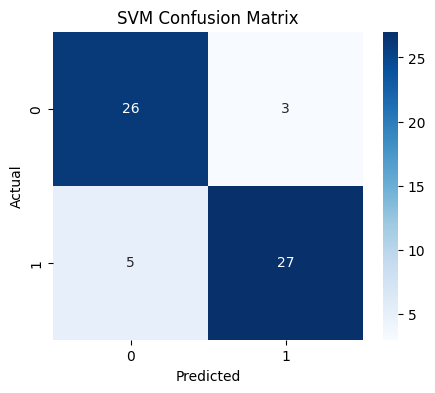

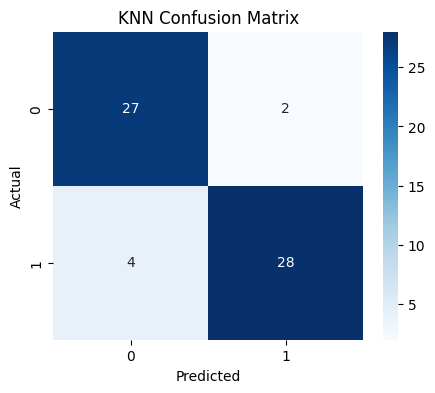

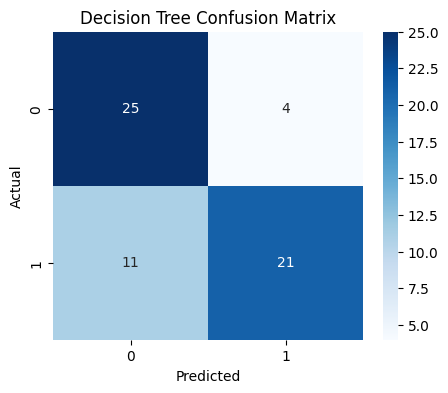

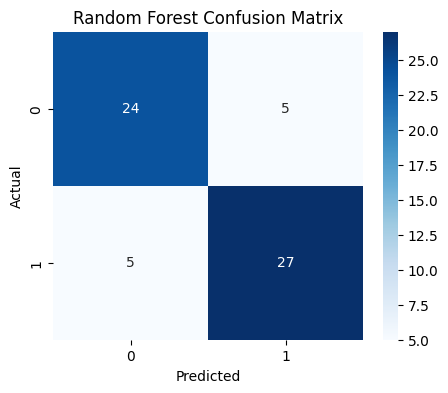

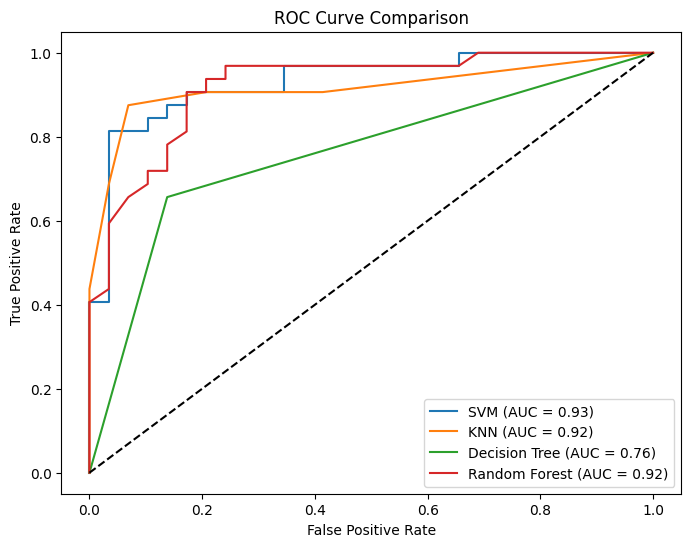

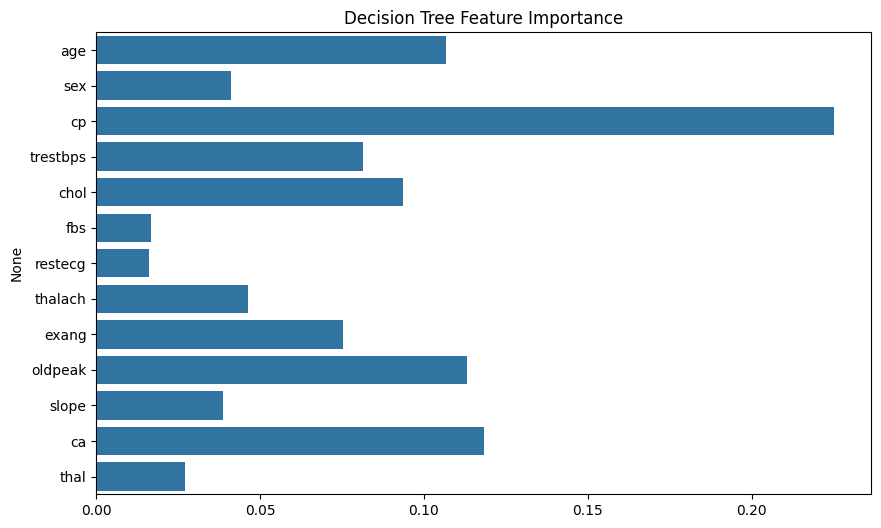

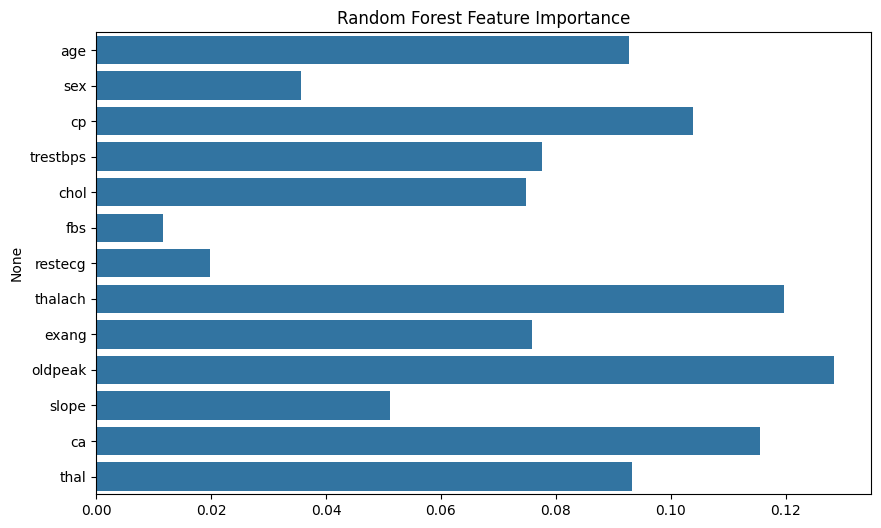

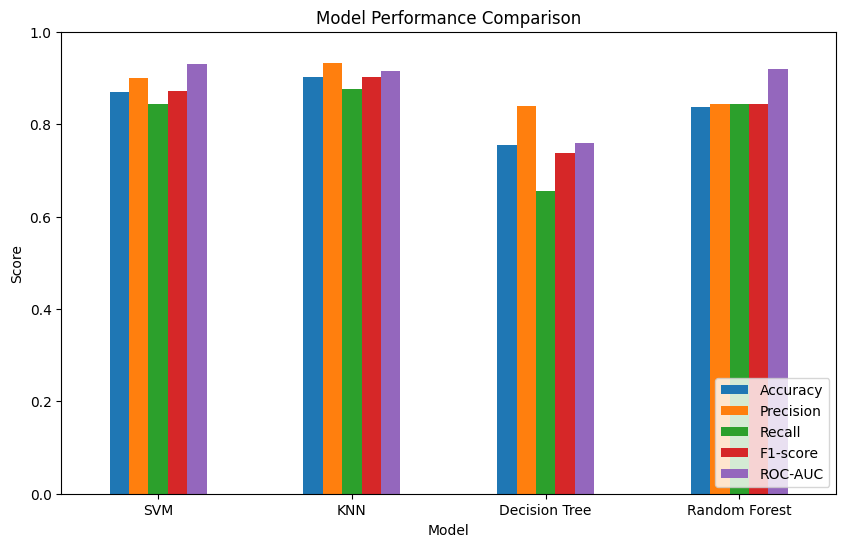

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a404da3250046ff0aa.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/heart .csv')
df.head()
df.sample(5)
df.info()
df.describe()
for i in df.columns:
  print(df[i].value_counts())
  print()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

predictions = {}
for name, model in models.items():
    if name in ["SVM", "KNN"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:,1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:,1]

    predictions[name] = {"y_pred": y_pred, "y_proba": y_proba}
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

metrics_list = []

for name, result in predictions.items():
    y_pred = result["y_pred"]
    y_proba = result["y_proba"]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    metrics_list.append({
        "Model": name,
        "Accuracy": round(accuracy, 3),
        "Precision": round(precision, 3),
        "Recall": round(recall, 3),
        "F1-score": round(f1, 3),
        "ROC-AUC": round(roc_auc, 3)
    })

metrics_df = pd.DataFrame(metrics_list)
metrics_df
best_model_name = metrics_df.sort_values(by="Accuracy", ascending=False).iloc[0]["Model"]
print(f"Best model based on accuracy: {best_model_name}")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

for name, result in predictions.items():
    y_pred = result["y_pred"]
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))

for name, result in predictions.items():
    y_proba = result["y_proba"]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()
# Decision Tree
dt_model = models["Decision Tree"]
dt_importances = dt_model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=dt_importances, y=features)
plt.title("Decision Tree Feature Importance")
plt.show()

# Random Forest
rf_model = models["Random Forest"]
rf_importances = rf_model.feature_importances_

plt.figure(figsize=(10,6))
sns.barplot(x=rf_importances, y=features)
plt.title("Random Forest Feature Importance")
plt.show()
metrics_df = metrics_df.set_index("Model")

metrics_df[["Accuracy","Precision","Recall","F1-score","ROC-AUC"]].plot(kind="bar", figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()
import gradio as gr
import numpy as np

best_model = models[best_model_name]

def predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach,
                          exang, oldpeak, slope, ca, thal):
    input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg,
                            thalach, exang, oldpeak, slope, ca, thal]])

    scaled_data = scaler.transform(input_data)


    prediction = best_model.predict(scaled_data)[0]
    probability = best_model.predict_proba(scaled_data)[0][1]


    if prediction == 1:
        result = f" The person is predicted to HAVE heart disease.\n Risk probability: {probability:.3f}"
    else:
        result = f" The person is predicted to NOT have heart disease.\n Risk probability: {probability:.3f}"
    return result

interface = gr.Interface(
    fn=predict_heart_disease,
    inputs=[
        gr.Number(label="Age", value=55),
        gr.Radio([0, 1], label="Sex (0 = Female, 1 = Male)", value=1),
        gr.Slider(0, 3, step=1, label="Chest Pain Type (cp)"),
        gr.Number(label="Resting Blood Pressure (trestbps)", value=140),
        gr.Number(label="Cholesterol (chol)", value=220),
        gr.Radio([0, 1], label="Fasting Blood Sugar > 120 mg/dl (fbs)", value=0),
        gr.Slider(0, 2, step=1, label="Resting ECG Results (restecg)"),
        gr.Number(label="Maximum Heart Rate Achieved (thalach)", value=160),
        gr.Radio([0, 1], label="Exercise Induced Angina (exang)", value=0),
        gr.Number(label="Oldpeak (ST depression)", value=1.2),
        gr.Slider(0, 2, step=1, label="Slope of peak exercise ST segment (slope)"),
        gr.Slider(0, 4, step=1, label="Number of major vessels (ca)"),
        gr.Slider(0, 3, step=1, label="Thalassemia (thal)")
    ],
    outputs="text",
    title=" Heart Disease Prediction App",
    description="Enter patient details to predict whether the person has heart disease or not.",
    theme="soft"
)

interface.launch()




